In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, KFold
from sklearn import metrics
import xgboost as xgb
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MatrixFactorization, MICE
from sklearn import preprocessing

In [39]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [37]:
encoder  = preprocessing.LabelEncoder()
train.Park_ID = encoder.fit_transform(train.Park_ID)
train.Park_ID.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [27]:
train.describe()

/home/arjun/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
count,1.145390e+05,114539.000000,110608.000000,110608.000000,110603.000000,110605.000000,106257.000000,74344.000000,74344.000000,74344.000000,82894.000000,82894.000000,114499.000000,114499.000000,114499.000000,114539.000000,114539.000000
mean,3.517595e+06,25.582596,179.587146,34.255340,51.704297,17.282553,18.802545,8331.545949,8356.053468,8305.692510,162.806138,306.555698,248.008970,283.917082,202.355331,2.630720,1204.217192
std,1.189083e+05,8.090592,85.362934,17.440065,22.068301,14.421844,38.269851,80.943971,76.032983,87.172258,90.869627,38.188020,28.898084,15.637930,46.365728,0.967435,248.385651
min,3.311712e+06,12.000000,1.000000,3.040000,7.600000,0.000000,0.000000,7982.000000,8037.000000,7890.000000,4.000000,8.000000,102.000000,141.000000,48.000000,1.000000,310.000000
25%,3.414820e+06,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1026.000000
50%,3.517039e+06,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1216.000000
75%,3.619624e+06,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1402.000000
max,3.725639e+06,39.000000,360.000000,154.280000,212.800000,129.200000,1181.090000,8588.000000,8601.000000,8571.000000,348.000000,356.000000,300.000000,300.000000,300.000000,4.000000,1925.000000


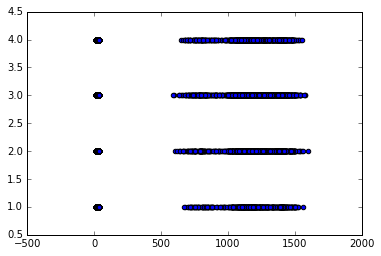

In [28]:
plt.scatter(train.Park_ID, train.Location_Type)

train.Date = pd.to_datetime(train.Date)
plt.scatter(train[train.Date.dt.year == 1990]['Footfall'], train[train.Date.dt.year == 1990]['Location_Type'])


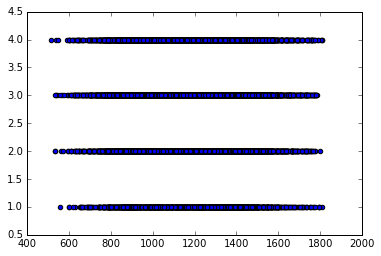

In [20]:
plt.scatter(train[train.Date.dt.year == 1991]['Footfall'], train[train.Date.dt.year == 1991]['Location_Type'])

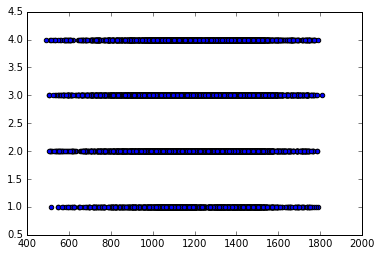

In [21]:
plt.scatter(train[train.Date.dt.year == 1992]['Footfall'], train[train.Date.dt.year == 1992]['Location_Type'])

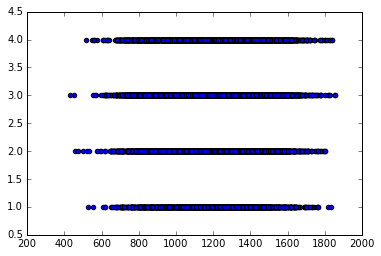

In [22]:
plt.scatter(train[train.Date.dt.year == 1995]['Footfall'], train[train.Date.dt.year == 1995]['Location_Type'])

In [271]:
train.isnull().sum()

ID                                  0
Park_ID                             0
Date                                0
Direction_Of_Wind                3931
Average_Breeze_Speed             3931
Max_Breeze_Speed                 3936
Min_Breeze_Speed                 3934
Var1                             8282
Average_Atmospheric_Pressure    40195
Max_Atmospheric_Pressure        40195
Min_Atmospheric_Pressure        40195
Min_Ambient_Pollution           31645
Max_Ambient_Pollution           31645
Average_Moisture_In_Park           40
Max_Moisture_In_Park               40
Min_Moisture_In_Park               40
Location_Type                       0
Footfall                            0
dtype: int64

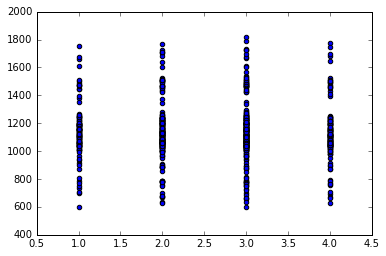

In [301]:
train.Date = pd.to_datetime(train.Date)
tr_1 = train[(train.Date.dt.month ==10) &  (train.Date.dt.year == 2000)]
plt.scatter(tr_1.Location_Type, tr_1.Footfall)

In [38]:
def transform_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data['Month'] = data['Date'].dt.month
    #data['Year'] = data['Date'].dt.year
    data['Day'] = data['Date'].dt.day
    # data['WeekOfYear'] = data['Date'].dt.weekofyear
    # data['DayOfYear'] = data['Date'].dt.dayofyear + 1
    # data['WeekDay'] = data['Date'].dt.weekday
    encoder  = preprocessing.LabelEncoder()
    data['Park_ID'] = encoder.fit_transform(data['Park_ID'])
    # Average Ambient Pollution bhi nikal lo
    data['Diff_Breeze_Speed'] = data['Max_Breeze_Speed'] - data['Min_Breeze_Speed']
    data['Diff_Atmospheric_Pressure'] = data['Max_Atmospheric_Pressure'] - data['Min_Atmospheric_Pressure']
    data['Diff_Ambient_Pollution'] = data['Max_Ambient_Pollution'] - data['Min_Ambient_Pollution']
    data['Average_Ambient_Pollution'] = (data['Max_Ambient_Pollution'] + data['Min_Ambient_Pollution'])/2
    data['Diff_Moisture_In_Park'] = data['Max_Moisture_In_Park'] - data['Min_Moisture_In_Park']
    # data['Breeze_Speed'] = data['Diff_Breeze_Speed'] / data['Average_Breeze_Speed']
    # data['Atm_Pressure'] = data['Diff_Atmospheric_Pressure'] / data['Average_Atmospheric_Pressure']
    # data['Amb_Pollution'] = data['Diff_Ambient_Pollution'] / data['Average_Ambient_Pollution']
    # data['Moisture_In_Park'] = data['Diff_Moisture_In_Park'] / data['Average_Moisture_In_Park']
    # data = data.drop(labels=['Date'], axis=1)
    data = data.drop(labels=['Date','Max_Ambient_Pollution','Max_Atmospheric_Pressure','Max_Breeze_Speed' ,'Max_Moisture_In_Park', 'Min_Moisture_In_Park','Min_Ambient_Pollution', 'Min_Atmospheric_Pressure', 'Min_Breeze_Speed' ], axis=1)
    # data = data.drop(labels=['Diff_Breeze_Speed', 'Diff_Atmospheric_Pressure', 'Diff_Ambient_Pollution', 'Diff_Moisture_In_Park', 'Average_Moisture_In_Park', 'Average_Ambient_Pollution', 'Average_Atmospheric_Pressure', 'Average_Breeze_Speed'], axis =1)
    # data['Year'] = data['Year'] - data['Year'].min()
    columns = data.columns.values
    # data.loc[data['Direction_Of_Wind'].isnull(), 'Direction_Of_Wind'] = np.round(np.random.uniform(0,360))
    data['Direction_Of_Wind'].fillna(np.round(np.random.uniform(0,360)), inplace=True)
    # data = MICE().complete(data)
    
    for col in columns:
        # fill missing data with median values # GENERIC WAY
        #data.loc[data[col].isnull(), col] = data[col].median()
        # random sampling
        # data.loc[data[col].isnull(), col] = data.loc[data[col].notnull(), col].sample( n = 1 )
        # data[col].fillna(np.random.choice(data.loc[data[col].notnull(), col]), inplace=True)
        data[col].fillna(method= 'ffill', inplace=True)
        #if (col not in['Park_ID', 'Location_Type', 'Footfall', 'Month', 'Year', 'Day', 'WeekDay', 'WeekOfYear', 'DayOfYear']):
            #data[col] = MinMaxScaler().fit_transform(data[col])
    
    return data;

In [28]:
train.head(50)
train.corr(method='pearson', min_periods=1)


,ID,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Max_Breeze_Speed,Min_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Max_Atmospheric_Pressure,Min_Atmospheric_Pressure,Min_Ambient_Pollution,Max_Ambient_Pollution,Average_Moisture_In_Park,Max_Moisture_In_Park,Min_Moisture_In_Park,Location_Type,Footfall
ID,1.000000,0.006604,0.000188,-0.019711,-0.022828,-0.019252,-0.016422,0.013205,0.002701,0.022042,0.030235,-0.011796,-0.046205,0.003539,-0.048289,-0.020017,0.005945
Park_ID,0.006604,1.000000,-0.011702,-0.254700,-0.244308,-0.206895,-0.012029,0.024007,0.023070,0.026726,-0.030881,0.041081,-0.039819,0.098473,-0.110576,0.032950,0.004938
Direction_Of_Wind,0.000188,-0.011702,1.000000,0.130190,0.174913,0.053646,0.144963,-0.113537,-0.096337,-0.133386,0.044231,0.122890,0.131413,0.108886,0.110538,-0.001736,0.097791
Average_Breeze_Speed,-0.019711,-0.254700,0.130190,1.000000,0.939240,0.879702,0.241275,-0.338415,-0.284753,-0.372108,0.287912,0.029159,-0.004368,-0.294786,0.171017,-0.063469,-0.074574
Max_Breeze_Speed,-0.022828,-0.244308,0.174913,0.939240,1.000000,0.739617,0.280360,-0.360265,-0.298931,-0.403972,0.261887,0.089219,-0.015761,-0.242604,0.122521,-0.068548,-0.037826
Min_Breeze_Speed,-0.019252,-0.206895,0.053646,0.879702,0.739617,1.000000,0.159921,-0.262979,-0.228288,-0.280722,0.259042,-0.053827,0.030279,-0.302916,0.207190,-0.042174,-0.109744
Var1,-0.016422,-0.012029,0.144963,0.241275,0.280360,0.159921,1.000000,-0.373926,-0.329983,-0.387436,-0.077260,-0.003581,0.231970,0.140922,0.202088,-0.004550,0.058543
Average_Atmospheric_Pressure,0.013205,0.024007,-0.113537,-0.338415,-0.360265,-0.262979,-0.373926,1.000000,0.974096,0.975541,-0.038343,-0.046624,-0.153256,-0.050730,-0.172049,0.004875,-0.054022
Max_Atmospheric_Pressure,0.002701,0.023070,-0.096337,-0.284753,-0.298931,-0.228288,-0.329983,0.974096,1.000000,0.913437,-0.044225,-0.054715,-0.122840,-0.038282,-0.138939,0.005146,-0.107707
Min_Atmospheric_Pressure,0.022042,0.026726,-0.133386,-0.372108,-0.403972,-0.280722,-0.387436,0.975541,0.913437,1.000000,-0.041464,-0.047115,-0.168049,-0.057040,-0.189426,0.005378,-0.004614


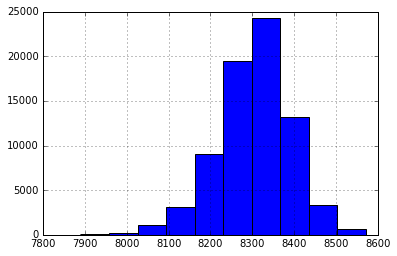

In [21]:
train.Min_Atmospheric_Pressure.hist()


In [40]:
df = train
df= df.drop(labels='Footfall', axis=1)
df= df.append(test, ignore_index=True)
df = df.drop('ID', axis=1)

print (train.shape, test.shape, df.shape)
df = transform_data(df)

((114539, 18), (39420, 17), (153959, 16))


In [51]:
df.head()

,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Average_Moisture_In_Park,Location_Type,Month,Day,Diff_Breeze_Speed,Diff_Atmospheric_Pressure,Diff_Ambient_Pollution,Average_Ambient_Pollution,Diff_Moisture_In_Park
0,12,0.537604,0.226131,0.078004,0.400990,0.785714,3,1,9,0.285714,0.123967,0.630952,0.554913,0.261905
1,12,0.791086,0.195980,0.011947,0.412541,0.771429,3,2,9,0.333333,0.198347,0.476190,0.710983,0.369048
2,12,0.885794,0.266332,0.030218,0.559406,0.614286,3,3,9,0.285714,0.190083,0.166667,0.745665,0.452381
3,12,0.824513,0.150754,0.000021,0.655116,0.642857,3,4,9,0.190476,0.096419,0.154762,0.843931,0.273810
4,12,0.573816,0.170854,0.000703,0.643564,0.685714,3,5,9,0.238095,0.151515,0.285714,0.803468,0.357143


In [41]:
print (train.shape, test.shape, df.shape)
df_train_data = df.ix[0:train.shape[0]-1,]
df_train_labels = train['Footfall']
df_test_data = df.ix[train.shape[0]:df.shape[0],]
target = 'Footfall'
print (df_train_data.shape, df_test_data.shape, df_train_labels.shape)

((114539, 18), (39420, 17), (153959, 14))
((114539, 14), (39420, 14), (114539,))


In [53]:
df_train_data.head()

,Park_ID,Direction_Of_Wind,Average_Breeze_Speed,Var1,Average_Atmospheric_Pressure,Average_Moisture_In_Park,Location_Type,Month,Day,Diff_Breeze_Speed,Diff_Atmospheric_Pressure,Diff_Ambient_Pollution,Average_Ambient_Pollution,Diff_Moisture_In_Park
0,12,0.537604,0.226131,0.078004,0.400990,0.785714,3,1,9,0.285714,0.123967,0.630952,0.554913,0.261905
1,12,0.791086,0.195980,0.011947,0.412541,0.771429,3,2,9,0.333333,0.198347,0.476190,0.710983,0.369048
2,12,0.885794,0.266332,0.030218,0.559406,0.614286,3,3,9,0.285714,0.190083,0.166667,0.745665,0.452381
3,12,0.824513,0.150754,0.000021,0.655116,0.642857,3,4,9,0.190476,0.096419,0.154762,0.843931,0.273810
4,12,0.573816,0.170854,0.000703,0.643564,0.685714,3,5,9,0.238095,0.151515,0.285714,0.803468,0.357143


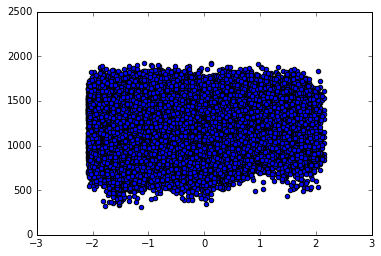

In [288]:
plt.scatter(df_train_data.Direction_Of_Wind, df_train_labels)

In [48]:
def apply_grid_search(regressor_algo, parameters, data, labels):
    result_rmse = []
    result_score = []
    train_data, tr_test_data, train_labels, tr_test_labels = train_test_split( data, labels, test_size=0.33, random_state=42)
    reg = regressor_algo
    grid_search = GridSearchCV(reg, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("parameters:")
    print(parameters)
    grid_search.fit(train_data, train_labels)
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

    best_est= grid_search.best_estimator_    
    predicted_labels = best_est.predict(tr_test_data)
    error = np.sqrt(metrics.mean_squared_error(tr_test_labels,predicted_labels))
    result_rmse.append(error)
    result_score.append(best_est.score(tr_test_data, tr_test_labels))

    return ( result_rmse, result_score, best_est )

In [47]:
param_grid_ = {'max_depth': [3, 5, 7, 10],
              'n_estimators' : [100, 250, 500],
               'learning_rate' : [0.1, 0.05, 0.01]
             }
gridSearch_rmse_, gridSearch_score_, bestEstimator_ = apply_grid_search(xgb.XGBRegressor(), \
                                                                        param_grid_, df_train_data, df_train_labels)


Performing grid search...
parameters:
{'n_estimators': [100, 250, 500], 'learning_rate': [0.1, 0.05, 0.01], 'max_depth': [3, 5, 7, 10]}
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 16.0min finished


()
Best score: 0.919
Best parameters set:
	learning_rate: 0.1
	max_depth: 10
	n_estimators: 500


NameError: global name 'math' is not defined

In [44]:
data = df_train_data
labels = df_train_labels
params = bestEstimator_.get_params()
result_rmse = []
cv = KFold(len(data), n_folds=10, shuffle=False, random_state=None)
#gb1 = GradientBoostingRegressor( n_estimators = 200, max_depth = 10, learning_rate = 0.01) #BestTillNow 
gb1 = xgb.XGBRegressor(**params)
for trainindex, testindex in cv:
    randomindexs = np.random.permutation(len(data))
    data = data.iloc[randomindexs]
    labels = labels.iloc[randomindexs]
    train_data = data.iloc[trainindex]
    train_labels = labels.iloc[trainindex]
    tr_test_data = data.iloc[testindex]
    tr_test_labels = labels.iloc[testindex]

    gb1.fit(train_data, train_labels)
    predicted_labels = gb1.predict(tr_test_data)
    rmse= np.sqrt(metrics.mean_squared_error(tr_test_labels, predicted_labels))
    result_rmse.append(rmse)

print (result_rmse)
print ('mean rmse: ', np.mean(result_rmse))


[64.092687604766667, 62.878507951790738, 63.764818315551786, 64.251997468273885, 63.890284912411943, 63.287420306233876, 63.647491807569864, 63.088171384144125, 63.57911871906105, 63.507937126907578]
('mean rmse: ', 63.598843559671153)


In [42]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split( df_train_data, df_train_labels, test_size=0.25, random_state=42) 
gb1 = xgb.XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators = 500)
#gb1 = GradientBoostingRegressor( n_estimators = 500, max_depth = 10, learning_rate = 0.01)
gb1.fit(X_train, y_train)
predicted_labels = gb1.predict(X_test)
rmse= np.sqrt(metrics.mean_squared_error(y_test, predicted_labels))
print rmse

65.842814416


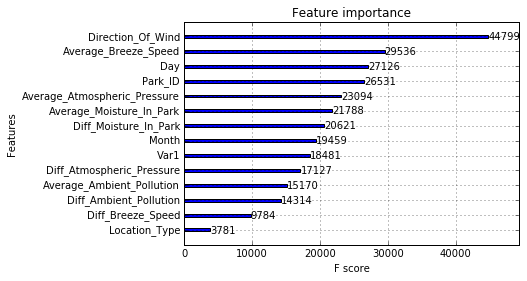

In [55]:
xgb.plot_importance(gb1)

In [56]:
predictions = pd.DataFrame(gb1.predict(df_test_data))
results = pd.DataFrame();
results['ID'] = test['ID']
results['Footfall'] = np.round(predictions)
timestr = time.strftime("%Y%m%d-%H%M%S")
results.to_csv('submission' + timestr + ".csv", index=False)